In [8]:
import pandas as pd
import numpy as np
import glob 
from os.path import join
import ntpath
import os
from collections import defaultdict
import math
import matplotlib.pyplot as plt
from matplotlib import rcParams
from utils import matplotlib_setup, extract_sampler_names
%matplotlib inline

In [9]:
patterns = [ "/" , "\\" , "|" , "-" , "+" , "x", "o", "O", ".", "*" ]
markers = ['>','*','<','o','^']
LINEWIDTH = 12
MSIZE = 40
MEDGESIZE = 12
det_metrics = ['any','majority','all']
eval_type='majority'
K=10
FILTERED =False
prefix = 'RF_FC_K_{}_'.format(K)
if FILTERED:
    outfile_regex = prefix+'{}_filtered.png'
else:
    outfile_regex = prefix+'{}.png'
def get_dataroot():
    return '/data/juma/data/ids18/'

In [10]:
def get_sampling_dirs(a_dir, only=''):
    dirs = [os.path.join(a_dir, name) for name in os.listdir(a_dir) 
                if os.path.isdir(os.path.join(a_dir, name)) and name.endswith('_l') ]
    return sorted(dirs)

In [11]:
def get_avg_abs_recall(d,eval_type):
    fn=None
    avg_recall_file = 'fold_avg_'.format(K)+eval_type+'.csv'

    if 'WS' in d:
        fn = join(d,'recall','fold_test{}.csv'.format(eval_type))
    elif K>5:
        fn = join(d,'K_{}/recall'.format(K),avg_recall_file)
    else:
        fn = join(d,'K/recall'.format(K),avg_recall_file)
        
    df = pd.read_csv(fn)
        
    filtered_attacks = ['Infiltration','Brute Force-XSS', 'SQL Injection']
    if FILTERED:
        avg_dt = df[(df['Label']!='Macro Average of Attacks') & (df['Label']!='Weighted Average of Attacks')&
                (~df['Label'].isin(filtered_attacks)) & (df['Label']!='Benign')]['Rc'].mean()
    else:
        avg_dt = df[(df['Label']!='Macro Average of Attacks') & (df['Label']!='Weighted Average of Attacks')\
                   & (df['Label']!='Benign')]['Rc'].mean()
    return avg_dt,None,None

In [12]:
xtick_labels = ['100%','10%','1%','0.1%']#,'5%','1%','0.5','0.1%']
xtick_indices = np.arange(len(xtick_labels))
classifier_fingerprint = 'c_forest_b_explicit_n_100_bootstrap_True_mf_auto_msl_3_ms_0.01_md_25'

outfile /data/juma/data/net_intrusion/ids18/CSVs_r_1.0_m_1.0/WS_l/RF_FC_K_10_majority.png


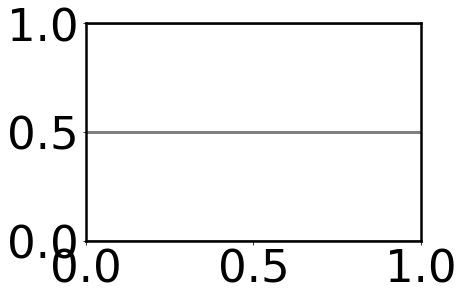

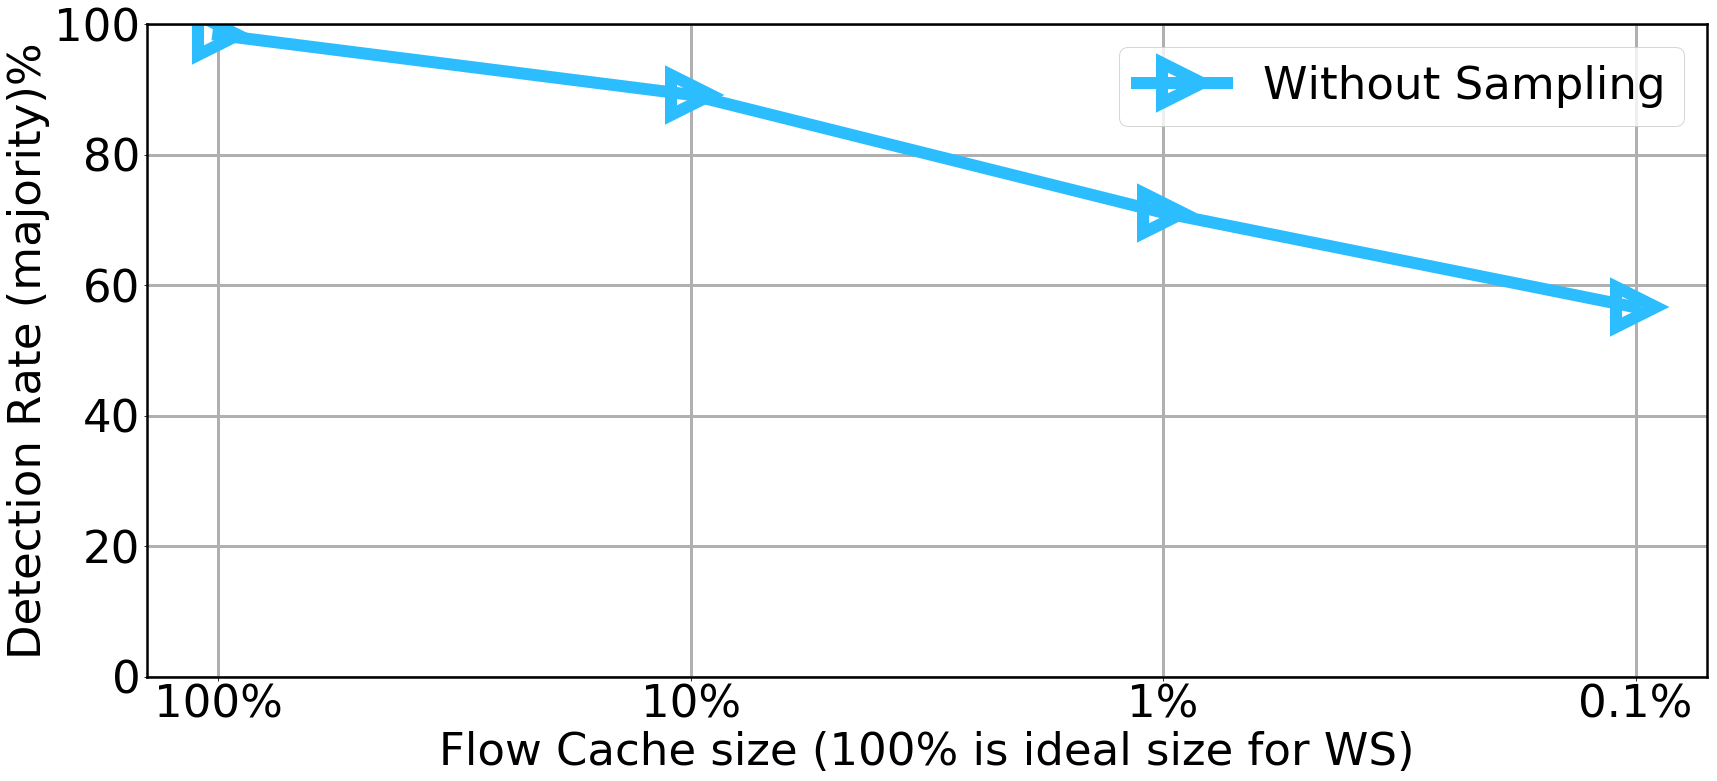

In [32]:
WS_dirs = ['/data/juma/data/net_intrusion/ids18/CSVs_r_1.0_m_1.0/WS_l/',
         '/data/juma/data/net_intrusion/ids18/CSVs_r_0.1_m_1.0/WS_l/',
         '/data/juma/data/net_intrusion/ids18/CSVs_r_0.01_m_1.0/WS_l/',           
         '/data/juma/data/net_intrusion/ids18/CSVs_r_0.001_m_1.0/WS_l/',
        ]
recalls = defaultdict(list)

avg_abs_rcs = [get_avg_abs_recall(join(d,classifier_fingerprint),eval_type=eval_type) for d in WS_dirs]
for i in range(len(avg_abs_rcs)):
        avg_dr, long_dr, short_dr = avg_abs_rcs[i]
        recalls['WS'].append(avg_dr)
        
#drawing
matplotlib_setup()    
fig, ax = plt.subplots(nrows=1,ncols=1,sharex=False,figsize=(25,12))
ax.plot(np.arange(len(WS_dirs)),recalls['WS'],label='Without Sampling',linewidth=LINEWIDTH,marker=markers[0],markersize=MSIZE,\
        markeredgewidth=MEDGESIZE,markerfacecolor='none')
ax.set_ylim(0,100)

plt.grid(linewidth=3)

plt.ylabel('Detection Rate ({})%'.format(eval_type))
plt.xlabel('Flow Cache size (100% is ideal size for WS)')
plt.xticks(xtick_indices,xtick_labels)
fig.tight_layout()
plt.legend(ncol=2)

outfile = join(WS_dirs[0],outfile_regex.format(eval_type))
print('outfile', outfile)
plt.savefig(outfile, bbox_inches='tight',dpi=100)
plt.show()

In [ ]:
sr_dir = 'SR_10.0'
roots = ['/data/juma/data/ids18/CSVs_r_1.0_m_1.0/{}/'.format(sr_dir),
         '/data/juma/data/ids18/CSVs_r_0.1_m_1.0/{}/'.format(sr_dir),
        '/data/juma/data/ids18/CSVs_r_0.01_m_1.0/{}/'.format(sr_dir),
        '/data/juma/data/ids18/CSVs_r_0.001_m_1.0/{}/'.format(sr_dir),
        ]

classifier_fingerprint = 'c_forest_b_explicit_n_100_bootstrap_True_mf_auto_msl_3_ms_0.01_md_25'

recalls = defaultdict(list)
sampler_names = None
for root in roots:
    sampling_dirs = get_sampling_dirs(root)
    sampler_names = extract_sampler_names(sampling_dirs)   
    avg_abs_rcs = [get_avg_abs_recall(join(d,classifier_fingerprint),eval_type=eval_type) for d in sampling_dirs]
    for i,name in enumerate(sampler_names): 
        avg_dr, long_dr, short_dr = avg_abs_rcs[i]
        recalls[name].append(avg_dr)
        
    
#drawing
matplotlib_setup()    
fig, ax = plt.subplots(nrows=1,ncols=1,sharex=False,figsize=(25,12))
markers = ['>','*','<','o','^']
for i,name in enumerate(sampler_names):
    ax.plot(np.arange(len(roots)),recalls[name],label=sampler_names[i],linewidth=LINEWIDTH,marker=markers[i],\
            markersize=MSIZE, markeredgewidth=MEDGESIZE,markerfacecolor='none')

plt.grid(linewidth=3)

plt.ylabel('Detection Rate ({})%'.format(eval_type))
plt.xlabel('SR 1/10: Flow Cache size (100% is ideal size for WS)')
plt.xticks(xtick_indices,xtick_labels)
ax.set_ylim(55,95)
fig.tight_layout()
plt.legend(ncol=2)

outfile = join(roots[0],outfile_regex.format(eval_type))
plt.savefig(outfile, bbox_inches='tight',dpi=100)
plt.show()

In [ ]:
sr_dir = 'SR_1.0'
roots = ['/data/juma/data/ids18/CSVs_r_1.0_m_1.0/{}/'.format(sr_dir),
         '/data/juma/data/ids18/CSVs_r_0.1_m_1.0/{}/'.format(sr_dir),
        '/data/juma/data/ids18/CSVs_r_0.01_m_1.0/{}/'.format(sr_dir),
        '/data/juma/data/ids18/CSVs_r_0.001_m_1.0/{}/'.format(sr_dir),
        ]

classifier_fingerprint = 'c_forest_b_explicit_n_100_bootstrap_True_mf_auto_msl_3_ms_0.01_md_25'

recalls = defaultdict(list)
sampler_names = None
for root in roots:
    sampling_dirs = get_sampling_dirs(root)
    sampler_names = extract_sampler_names(sampling_dirs)   
    avg_abs_rcs = [get_avg_abs_recall(join(d,classifier_fingerprint),eval_type=eval_type) for d in sampling_dirs]
    for i,name in enumerate(sampler_names): 
        avg_dr, long_dr, short_dr = avg_abs_rcs[i]
        recalls[name].append(avg_dr)
        
    
#drawing
matplotlib_setup()    
fig, ax = plt.subplots(nrows=1,ncols=1,sharex=False,figsize=(25,12))
markers = ['>','*','<','o','^']
for i,name in enumerate(sampler_names):
    print(sampler_names[i],recalls[name])
    ax.plot(np.arange(len(roots)),recalls[name],label=sampler_names[i],linewidth=LINEWIDTH,marker=markers[i],\
            markersize=MSIZE, markeredgewidth=MEDGESIZE,markerfacecolor='none')

plt.grid(linewidth=3)

plt.ylabel('Detection Rate ({})%'.format(eval_type))
plt.xlabel('SR 1/100: Flow Cache size (100% is ideal size for WS)')
plt.xticks(xtick_indices,xtick_labels)
ax.set_ylim(0,100)
fig.tight_layout()
plt.legend(ncol=2)

outfile = join(roots[0],outfile_regex.format(eval_type))
plt.savefig(outfile, bbox_inches='tight',dpi=100)
plt.show()

In [ ]:
sr_dir = 'SR_0.1'
roots = ['/data/juma/data/ids18/CSVs_r_1.0_m_1.0/{}/'.format(sr_dir),
        '/data/juma/data/ids18/CSVs_r_0.1_m_1.0/{}/'.format(sr_dir),
        '/data/juma/data/ids18/CSVs_r_0.01_m_1.0/{}/'.format(sr_dir),
        '/data/juma/data/ids18/CSVs_r_0.001_m_1.0/{}/'.format(sr_dir),

        ]

classifier_fingerprint = 'c_forest_b_explicit_n_100_bootstrap_True_mf_auto_msl_3_ms_0.01_md_25'



recalls = defaultdict(list)
sampler_names = None
for root in roots:
    sampling_dirs = get_sampling_dirs(root)
    sampler_names = extract_sampler_names(sampling_dirs)   
    avg_abs_rcs = [get_avg_abs_recall(join(d,classifier_fingerprint),eval_type=eval_type) for d in sampling_dirs]
    for i,name in enumerate(sampler_names): 
        avg_dr, long_dr, short_dr = avg_abs_rcs[i]
        recalls[name].append(avg_dr)
        
    
#drawing
matplotlib_setup()    
fig, ax = plt.subplots(nrows=1,ncols=1,sharex=False,figsize=(25,12))
markers = ['>','*','<','o','^']
for i,name in enumerate(sampler_names):
    print(sampler_names[i],recalls[name])
    ax.plot(np.arange(len(roots)),recalls[name],label=sampler_names[i],linewidth=LINEWIDTH,marker=markers[i],\
            markersize=MSIZE, markeredgewidth=MEDGESIZE,markerfacecolor='none')
    
plt.grid(linewidth=3)

plt.ylabel('Detection Rate ({})%'.format(eval_type))
plt.xlabel('SR 1/1000: Flow Cache size (100% is ideal size for WS)')
plt.xticks(xtick_indices,xtick_labels)
ax.set_ylim(0,100)
fig.tight_layout()
plt.legend(ncol=2)

outfile = join(roots[0],outfile_regex.format(eval_type))
plt.savefig(outfile, bbox_inches='tight',dpi=100)
plt.show()

# Combined

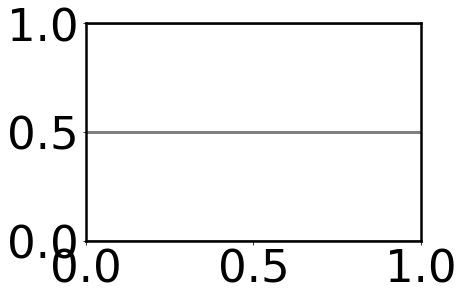

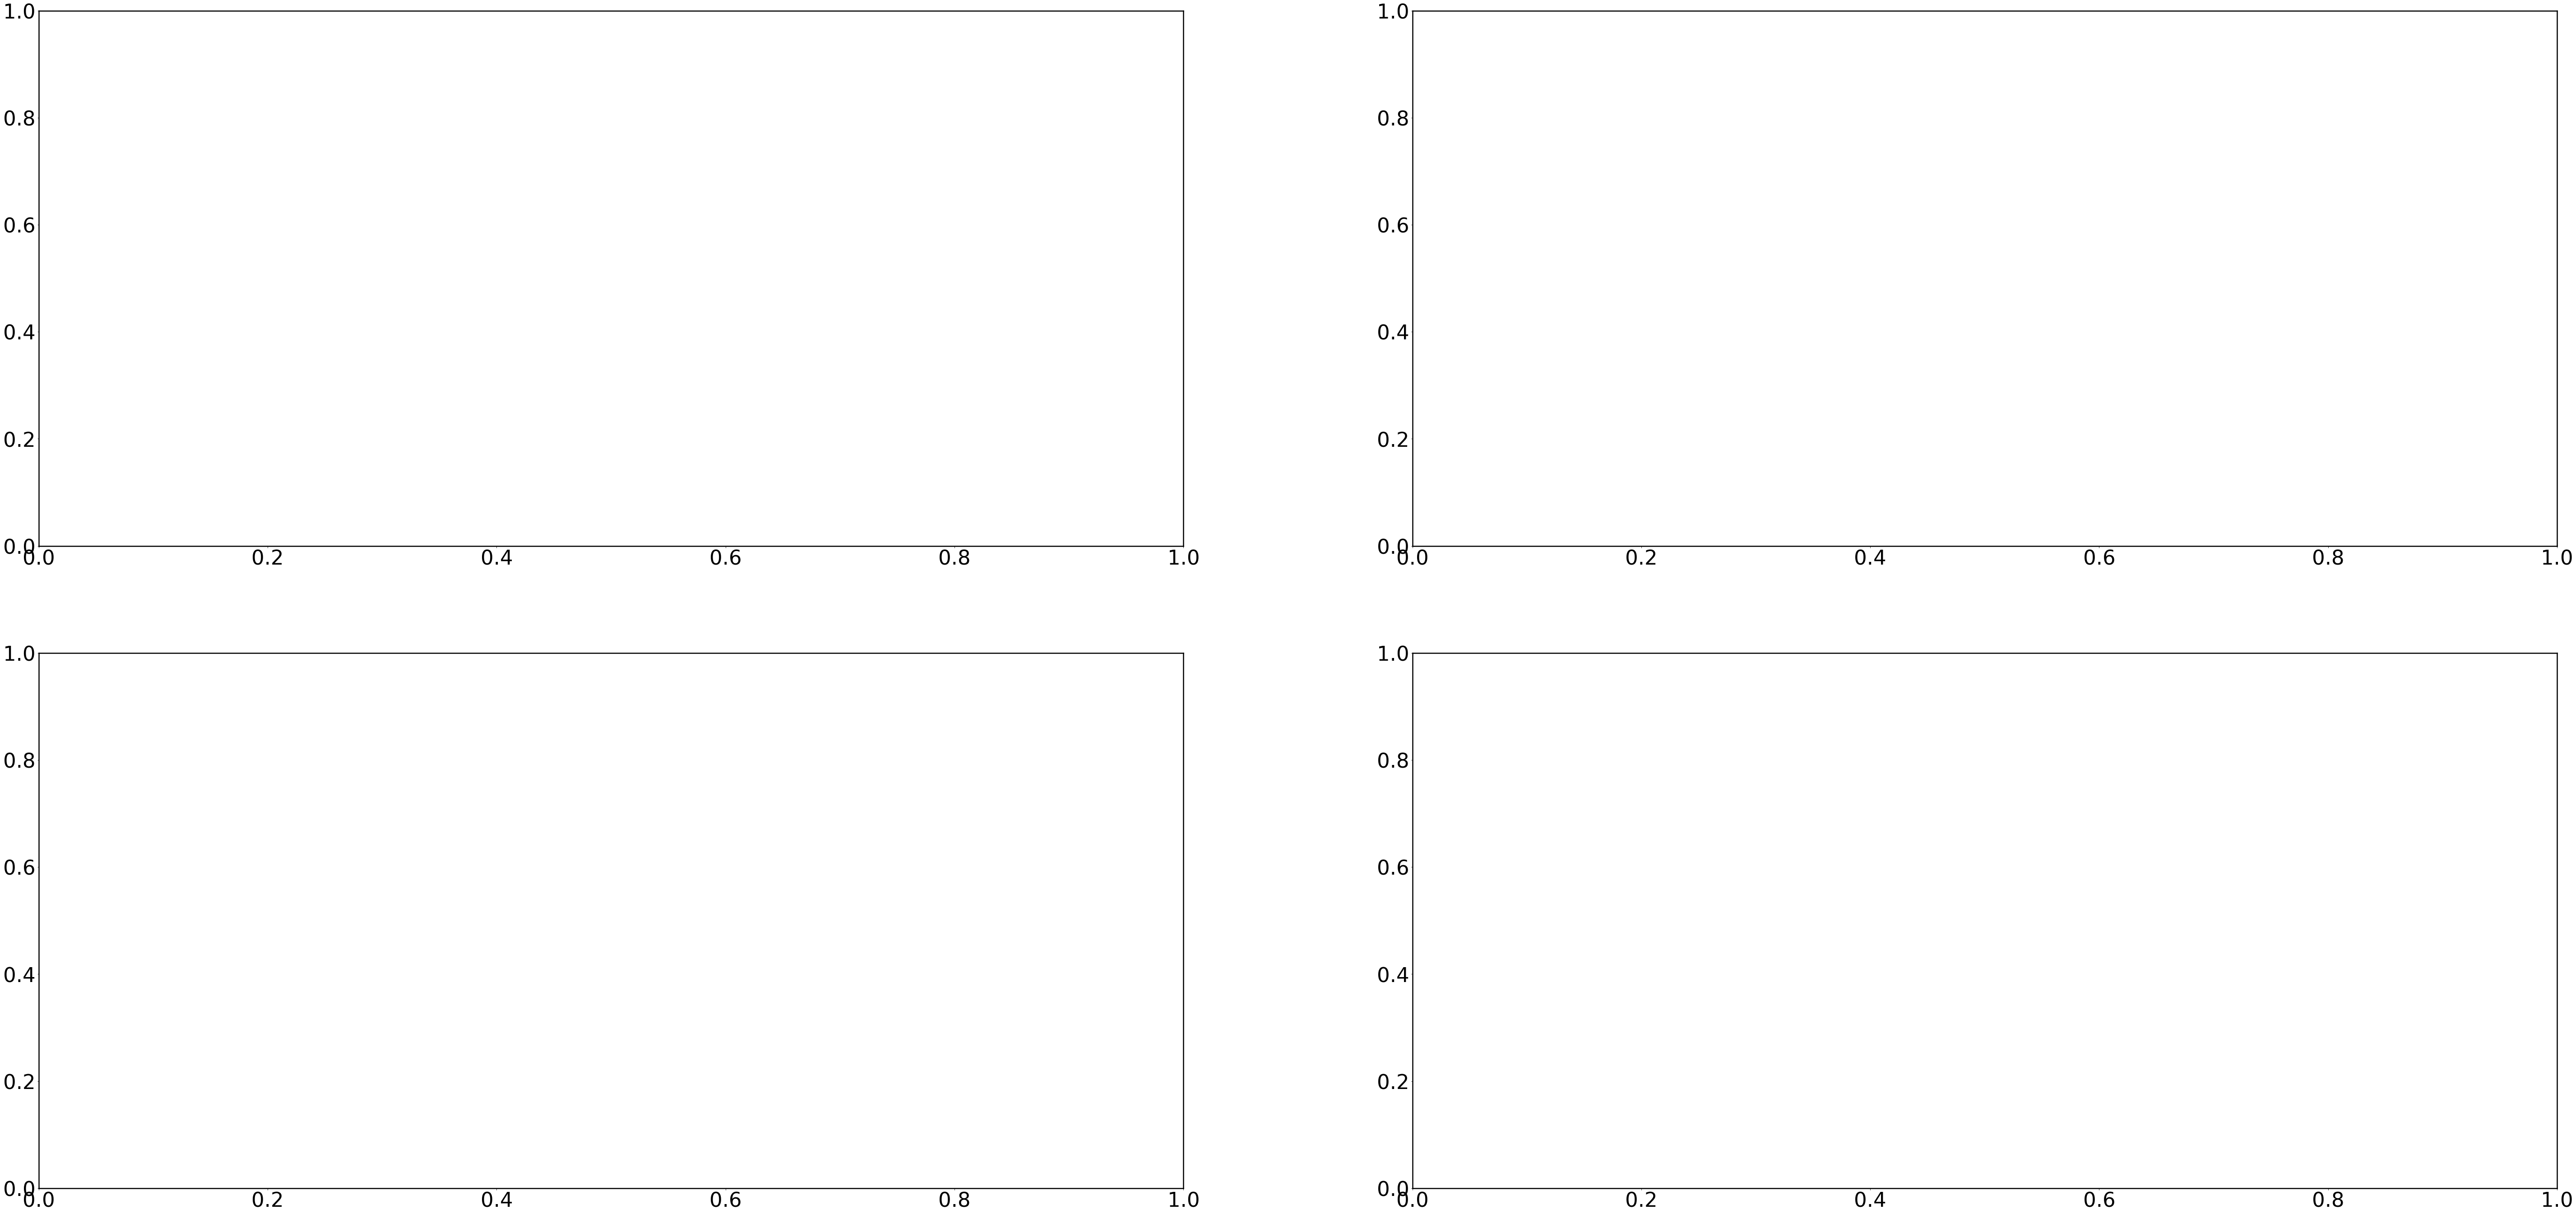

In [29]:
matplotlib_setup()    
fig, axes = plt.subplots(nrows=2,ncols=2,sharex=False,figsize=(100,48))
markers = ['>','*','<','o','^']
classifier_fingerprint = 'c_forest_b_explicit_n_100_bootstrap_True_mf_auto_msl_3_ms_0.01_md_25'

In [36]:
ax = axes[0,0]
WS_dirs = ['/data/juma/data/net_intrusion/ids18/CSVs_r_1.0_m_1.0/WS_l/',
         '/data/juma/data/net_intrusion/ids18/CSVs_r_0.1_m_1.0/WS_l/',
         '/data/juma/data/net_intrusion/ids18/CSVs_r_0.01_m_1.0/WS_l/',           
         '/data/juma/data/net_intrusion/ids18/CSVs_r_0.001_m_1.0/WS_l/',
        ]
recalls = defaultdict(list)

avg_abs_rcs = [get_avg_abs_recall(join(d,classifier_fingerprint),eval_type=eval_type) for d in WS_dirs]
for i in range(len(avg_abs_rcs)):
        avg_dr, long_dr, short_dr = avg_abs_rcs[i]
        recalls['WS'].append(avg_dr)
        
#drawing
ax.plot(np.arange(len(WS_dirs)),recalls['WS'],label='Without Sampling',linewidth=LINEWIDTH,marker=markers[0],markersize=MSIZE,\
        markeredgewidth=MEDGESIZE,markerfacecolor='none')
ax.set_ylim(0,100)

ax.set_ylabel('Detection Rate ({})%'.format(eval_type))
ax.set_xlabel('Flow Cache size (100% is ideal size for WS)')
ax.set_xticks(xtick_indices)
ax.set_xticklabels(xtick_labels)
#ax.legend(ncol=2)
plt.show()

In [ ]:
sr_dir = 'SI_1000'
roots = ['/data/juma/data/net_intrusion/ids18/CSVs_r_1.0_m_1.0/{}/'.format(sr_dir),
        '/data/juma/data/net_intrusion/ids18/CSVs_r_0.1_m_1.0/{}/'.format(sr_dir),
        '/data/juma/data/net_intrusion/ids18/CSVs_r_0.01_m_1.0/{}/'.format(sr_dir),
        '/data/juma/data/net_intrusion/ids18/CSVs_r_0.001_m_1.0/{}/'.format(sr_dir),

        ]

classifier_fingerprint = 'c_forest_b_explicit_n_100_bootstrap_True_mf_auto_msl_3_ms_0.01_md_25'



recalls = defaultdict(list)
sampler_names = None
for root in roots:
    sampling_dirs = get_sampling_dirs(root)
    sampler_names = extract_sampler_names(sampling_dirs)   
    avg_abs_rcs = [get_avg_abs_recall(join(d,classifier_fingerprint),eval_type=eval_type) for d in sampling_dirs]
    for i,name in enumerate(sampler_names): 
        avg_dr, long_dr, short_dr = avg_abs_rcs[i]
        recalls[name].append(avg_dr)
        
#drawing
matplotlib_setup()    
fig, axes = plt.subplots(nrows=2,ncols=2,sharex=False,figsize=(100,48))
markers = ['>','*','<','o','^']

ax = axes[1,1]
for i,name in enumerate(sampler_names):
    print(sampler_names[i],recalls[name])
    ax.plot(np.arange(len(roots)),recalls[name],label=sampler_names[i],linewidth=LINEWIDTH,marker=markers[i],\
            markersize=MSIZE, markeredgewidth=MEDGESIZE,markerfacecolor='none')
    
ax.grid(linewidth=3)

ax.set_ylabel('Detection Rate ({})%'.format(eval_type))
ax.set_xlabel('SR 1/1000: Flow Cache size (100% is ideal size for WS)')
ax.set_xticks(xtick_indices,xtick_labels)
ax.set_ylim(0,100)

ax.legend(ncol=2)


outfile = join(roots[0],outfile_regex.format(eval_type))
plt.savefig(outfile, bbox_inches='tight',dpi=100)
plt.show()

In [ ]:
sr_dir = 'SI_1000'
roots = ['/data/juma/data/net_intrusion/ids18/CSVs_r_1.0_m_1.0/{}/'.format(sr_dir),
        '/data/juma/data/net_intrusion/ids18/CSVs_r_0.1_m_1.0/{}/'.format(sr_dir),
        '/data/juma/data/net_intrusion/ids18/CSVs_r_0.01_m_1.0/{}/'.format(sr_dir),
        '/data/juma/data/net_intrusion/ids18/CSVs_r_0.001_m_1.0/{}/'.format(sr_dir),

        ]

classifier_fingerprint = 'c_forest_b_explicit_n_100_bootstrap_True_mf_auto_msl_3_ms_0.01_md_25'



recalls = defaultdict(list)
sampler_names = None
for root in roots:
    sampling_dirs = get_sampling_dirs(root)
    sampler_names = extract_sampler_names(sampling_dirs)   
    avg_abs_rcs = [get_avg_abs_recall(join(d,classifier_fingerprint),eval_type=eval_type) for d in sampling_dirs]
    for i,name in enumerate(sampler_names): 
        avg_dr, long_dr, short_dr = avg_abs_rcs[i]
        recalls[name].append(avg_dr)
        
#drawing
matplotlib_setup()    
fig, axes = plt.subplots(nrows=2,ncols=2,sharex=False,figsize=(100,48))
markers = ['>','*','<','o','^']

ax = axes[1,1]
for i,name in enumerate(sampler_names):
    print(sampler_names[i],recalls[name])
    ax.plot(np.arange(len(roots)),recalls[name],label=sampler_names[i],linewidth=LINEWIDTH,marker=markers[i],\
            markersize=MSIZE, markeredgewidth=MEDGESIZE,markerfacecolor='none')
    
ax.grid(linewidth=3)

ax.set_ylabel('Detection Rate ({})%'.format(eval_type))
ax.set_xlabel('SR 1/1000: Flow Cache size (100% is ideal size for WS)')
ax.set_xticks(xtick_indices,xtick_labels)
ax.set_ylim(0,100)

ax.legend(ncol=2)


outfile = join(roots[0],outfile_regex.format(eval_type))
plt.savefig(outfile, bbox_inches='tight',dpi=100)
plt.show()

In [24]:
sr_dir = 'SI_1000'
roots = ['/data/juma/data/net_intrusion/ids18/CSVs_r_1.0_m_1.0/{}/'.format(sr_dir),
        '/data/juma/data/net_intrusion/ids18/CSVs_r_0.1_m_1.0/{}/'.format(sr_dir),
        '/data/juma/data/net_intrusion/ids18/CSVs_r_0.01_m_1.0/{}/'.format(sr_dir),
        '/data/juma/data/net_intrusion/ids18/CSVs_r_0.001_m_1.0/{}/'.format(sr_dir),

        ]

classifier_fingerprint = 'c_forest_b_explicit_n_100_bootstrap_True_mf_auto_msl_3_ms_0.01_md_25'



recalls = defaultdict(list)
sampler_names = None
for root in roots:
    sampling_dirs = get_sampling_dirs(root)
    sampler_names = extract_sampler_names(sampling_dirs)   
    avg_abs_rcs = [get_avg_abs_recall(join(d,classifier_fingerprint),eval_type=eval_type) for d in sampling_dirs]
    for i,name in enumerate(sampler_names): 
        avg_dr, long_dr, short_dr = avg_abs_rcs[i]
        recalls[name].append(avg_dr)
        
ax = axes[1,1]
for i,name in enumerate(sampler_names):
    print(sampler_names[i],recalls[name])
    ax.plot(np.arange(len(roots)),recalls[name],label=sampler_names[i],linewidth=LINEWIDTH,marker=markers[i],\
            markersize=MSIZE, markeredgewidth=MEDGESIZE,markerfacecolor='none')
    
ax.grid(linewidth=3)

ax.set_ylabel('Detection Rate ({})%'.format(eval_type))
ax.set_xlabel('SR 1/1000: Flow Cache size (100% is ideal size for WS)')
ax.set_xticks(xtick_indices,xtick_labels)
ax.set_ylim(0,100)

ax.legend(ncol=2)


#outfile = join(roots[0],outfile_regex.format(eval_type))
#plt.savefig(outfile, bbox_inches='tight',dpi=100)
plt.show()

Fast Filtered Sampling [12.198461538461537, 12.198461538461537, 12.198461538461537, 12.33]
SketchFlow Sampling [15.09153846153846, 15.092307692307692, 15.070769230769232, 14.636153846153844]
Sketch Guided Sampling [6.4861538461538455, 6.486923076923077, 6.503846153846153, 6.507692307692308]
Simple Random Sampling [12.162307692307694, 12.162307692307694, 12.162307692307694, 12.286923076923078]


In [25]:
plt.show()